In [84]:
#import all these module 

import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [93]:
# from gym enviroment call FrozenLake
env = gym.make("FrozenLake8x8-v0")

In [94]:
#create Q-table
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [145]:
# Provide all initial values

num_episodes = 5000
max_steps_per_episode =  200

learning_rate = 0.2    # notation - η or α
discount_rate = 0.9    #notation - γ(gamma)

exploration_rate = 1   #notation - ε
max_exploration_rate = 1
min_exploration_rate = 0.1
exploration_decay_rate = 0.01



In [147]:
# This algorithm is for reward and step updation

rewards_all_episodes = []  
episode_steps = []

#Q - Learning algo
for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        #Exploration - exploitation trade- off
        exploration_rate_threshold = random.uniform(0, 1)   
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()
            
        new_state, reward, done, info = env.step(action)  #tuple unpacking
        
        
        #Updating Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        
        state = new_state               # change state to new_state
        rewards_current_episode += reward
        
        if done == True:
            break
            
            
    #Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
        
    rewards_all_episodes.append(rewards_current_episode)
    episode_steps.append(step)     # this is important step 
        
#calculating & printing the average reward per thousand episodes
 
rewards_per_50_episodes =np.split(np.array(rewards_all_episodes), num_episodes/50)    
count = 50
print("********Average rewards per 50 episodes********\n")
for r in rewards_per_50_episodes:
    print(count, ": ", str(sum(r/50)))                                                  
    count += 50
            
#print updated Q-table
print("\n\n*******Q-table********\n")
print(q_table)

********Average rewards per 50 episodes********

50 :  0.0
100 :  0.0
150 :  0.0
200 :  0.08
250 :  0.0
300 :  0.1
350 :  0.02
400 :  0.1
450 :  0.04
500 :  0.1
550 :  0.1
600 :  0.18
650 :  0.23999999999999996
700 :  0.18
750 :  0.06
800 :  0.12000000000000001
850 :  0.12000000000000001
900 :  0.12000000000000001
950 :  0.25999999999999995
1000 :  0.16
1050 :  0.21999999999999997
1100 :  0.23999999999999996
1150 :  0.14
1200 :  0.23999999999999996
1250 :  0.25999999999999995
1300 :  0.14
1350 :  0.06
1400 :  0.27999999999999997
1450 :  0.19999999999999998
1500 :  0.27999999999999997
1550 :  0.34
1600 :  0.27999999999999997
1650 :  0.25999999999999995
1700 :  0.12000000000000001
1750 :  0.25999999999999995
1800 :  0.18
1850 :  0.23999999999999996
1900 :  0.21999999999999997
1950 :  0.19999999999999998
2000 :  0.19999999999999998
2050 :  0.23999999999999996
2100 :  0.23999999999999996
2150 :  0.12000000000000001
2200 :  0.16
2250 :  0.3
2300 :  0.21999999999999997
2350 :  0.259999999999

In [153]:
# watching the agent play

for episode in range(3):
    state = env.reset()
    step = 0
    done = False
    print("*****Episode ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
    
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
    
        state = new_state
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You have reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
            clear_output(wait=True)
            break
        step += 1
   # state = new_state
    
env.close()

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
****You fell through a hole!****



This environment has been solved 18.76 % of times over 5000 episodes.


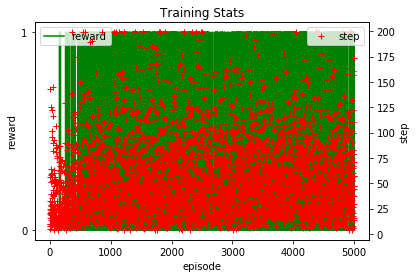

In [154]:
# show the success rate for solving the environment & elapsed training time
success_rate = round((sum(rewards_all_episodes) / num_episodes) * 100, 2)
#elapsed_training_time = int(training_end - training_start)
print("\nThis environment has been solved", str(success_rate), "% of times over",  str(num_episodes), "episodes.")

# plot the rewards and number of steps over all training episodes
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(rewards_all_episodes, '-g', label = 'reward')
ax1.set_yticks([0,1])
ax2 = ax1.twinx()
ax2.plot(episode_steps, '+r', label = 'step')
ax1.set_xlabel("episode")
ax1.set_ylabel("reward")
ax2.set_ylabel("step")
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.title("Training Stats")
plt.show()